## Import the required Modules

In [1]:
# Import numerical python libraries to create vectors and perform matrix multiplication
import numpy as np
import pandas as pd

# Import pyplot plotting library from matplotlib to plot similar to Matlab
from matplotlib import pyplot as plt

# Import a module to fetch the MNIST dataset
from sklearn.datasets import fetch_openml

# Import a module to rescale the MNIST images
from sklearn.preprocessing import StandardScaler

# Import the linear models from sklearn, specifically the MLPClassifier
from sklearn.neural_network import MLPClassifier

# Import the data handling utility to separate training and testing data
from sklearn.model_selection import train_test_split

# Import some helpful metrics to help us understand the models performance
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Define Helper Functions

In [19]:
def display_network(w, bias):
    for i, layer in enumerate(w):
        if i == len(w) - 1:
            message = f'Output Layer \n'
            temp = []
            for entry in layer:
                temp.append(entry[0])
            layer = [[temp]]
        else:
            message = f'Layer {i} \n'

        for j in range(len(layer[-1])):
            message += 'Neuron '
            b = bias[i][j] if j < len(bias[i]) else bias[i][-1]
            message += f'{j} {layer[:,j]} {b} ' if i < len(w) - 1 else f'{j} {layer[-1][-1]} {b}'
            message += '\n'

        print(message)

In [2]:
def plot_loss(loss):
    plt.plot(range(len(loss)), loss)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)

## Load and configure the Iris Dataset

In [62]:
# Load the MNIST dataset created by Yann LeCun et al.
features, labels = fetch_openml("mnist_784",
                                return_X_y=True, 
                                as_frame=False, 
                                parser="pandas")

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2)

# Rescale images to [-1,1] for ML
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

print('Dataset \t Feature Shape \t Label Shape')
print(f'Training \t {train_features.shape} \t {train_labels.shape}')
print(f'Testing \t {test_features.shape} \t {test_labels.shape}')

Dataset 	 Feature Shape 	 Label Shape
Training 	 (56000, 784) 	 (56000,)
Testing 	 (14000, 784) 	 (14000,)


## Model Training

In [63]:
# Define a MLP classifier
model = MLPClassifier(hidden_layer_sizes=(4),
                      activation='relu',
                      solver='adam',
                      learning_rate_init=0.01,
                      max_iter=1000, 
                      tol=0.01)

Training Accuracy: 0.8711607142857143


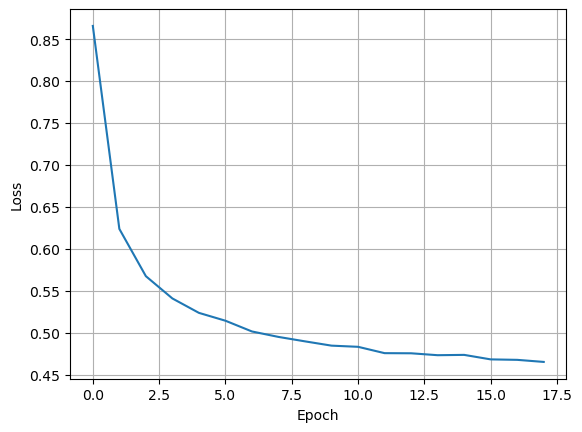

In [64]:
# Train the MLP classifier
model.fit(train_features, train_labels)
plot_loss(model.loss_curve_)
print(f'Training Accuracy: {model.score(train_features, train_labels)}')

## Validating Performance

In [65]:
# Store the model parameters (w1, w2, bias) locally
w = model.coefs_
bias = model.intercepts_

# Display network parameters
display_network(w, bias)

Layer 0 
Neuron 0 [-5.41309080e-117 -4.50451151e-118  5.47997467e-118  4.90490162e-117
 -7.74641511e-117 -6.27324191e-118 -5.42480202e-117  6.79852789e-117
 -4.26784741e-117 -1.28538790e-117  5.84431261e-117 -1.47218647e-117
 -2.92206339e+000 -3.28395281e+000 -2.86173956e+000 -2.79706276e+000
  1.16226971e-117 -6.20032197e-117  4.13797532e-118  6.62066177e-117
  9.43052051e-118 -4.00277509e-117  4.20406423e-117  1.96784376e-117
 -3.51267431e-117  1.20671321e-117 -1.78674974e-117  6.82679582e-118
 -5.60449435e-118 -3.12436416e-117 -2.82928497e-119 -2.41719468e-117
 -2.85496380e+000 -1.64472190e-001 -6.97769095e-002  6.75813895e-002
 -3.00080336e-002 -2.89596522e-001  7.25210585e-002  1.66589604e-001
  1.56542014e-001 -2.23048745e-002 -4.62666275e-002  3.06420137e-001
 -1.67012479e-001  6.68844367e-002 -7.87537996e-002 -2.05138360e-002
 -7.23739859e-002 -1.51975582e-001 -2.95711512e+000 -2.94904207e+000
 -2.20152138e-118  9.74039216e-118 -4.27398792e-117 -1.40310473e-117
  1.73307577e-11

In [66]:
# Use the trained model to make predictions on the test dataset
test_predictions = model.predict(test_features)
print(classification_report(test_labels, test_predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1393
           1       0.93      0.92      0.92      1558
           2       0.88      0.84      0.86      1346
           3       0.83      0.77      0.80      1455
           4       0.88      0.87      0.88      1381
           5       0.84      0.77      0.80      1304
           6       0.90      0.92      0.91      1338
           7       0.88      0.91      0.90      1477
           8       0.75      0.80      0.77      1352
           9       0.84      0.82      0.83      1396

    accuracy                           0.86     14000
   macro avg       0.86      0.86      0.86     14000
weighted avg       0.86      0.86      0.86     14000



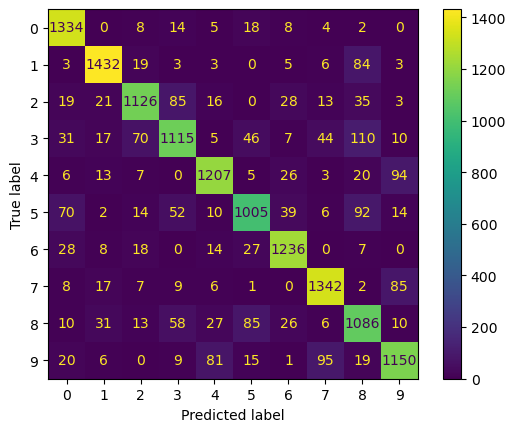

In [67]:
# Display the class accuracy using a confusion matrix
conf_mat = confusion_matrix (test_labels, test_predictions)
conf_disp = ConfusionMatrixDisplay(conf_mat)
conf_disp.plot()